# Example: Two Layer Model

### Simple Spreadsheet Calculator

This notebook will demonstrate the use of the `twolayermodel` convenience function which returns  an input dataframe for pyUserCalc consisting of a smoothed two layer model given in  the original UserCalc spreadsheet calculator (Spiegelman, 2000)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import UserCalc:
import UserCalc 

The documentation for this calculator is

In [2]:
UserCalc.twolayermodel?

Signature: UserCalc.twolayermodel(P, F, Kr, D_lower, D_upper, N=100, P_lambda=1)
Docstring:
create a pandas dataframe for the UserCalc sample two-layer model defined by a column that spans pressures from
P_bottom to P_top with a possible change in layer properties at pressure P_boundary that is smoothed over a pressure range given by P_lambda

Each layer can have its own bulk partition coefficient D, relative permeability Kr. 

The degree of melting is given by a smoothed ramp function defined by three values of F, F(P_bottom), F(P_boundary) and F(P_top)

Parameters:
-----------

P: array [ P_bottom, P_boundary, P_top ]
    pressure bounds in the column (assumed kb) 
    P[0] = P_bottom is the pressure at the bottom of the column
    P[1] = P_boundary is the pressure at the layer boundaries
    P[2] = P_top is the pressure at the top of the column
F: array [ F_bottom, F_boundary, F_top]
    Degree of melting at the bottom, layer boundary and top of the column
D_lower:  array [ D_U, D_T

#### Example

As an example we will construct a dataframe with $N=41$ rows for a 2 layer model where the lower layer  extends from 40-20 Kb,  and the upper layer from 20-0 Kb.

The properties of each layer will transition smoothly over a lengthscale of approximately $P_\lambda = 1$ Kb.

In [3]:
# set up input data for two layer model

# Number of rows in the dataframe
N = 41

# Pressure [ Bottom, layer_boundary, Top] in kb
P = [40., 20, 0.]

# Pressure smoothing parameter (in Kb)
P_lambda = 1.

The degree of melting in the lower layer will range linearly from $F=0$ to $F=0.05$, and in the upper layer from $F=0.05$ to $F=0.2$

In [4]:
# Degree of melting [Bottom, layer_boundary, Top ]
F = [ 0., 0.05, 0.2]

Each layer can have its own relative permeability and Bulk partition coefficients for $DU$, $DTh$, $DRa$ and $DPa$

In [5]:
# Relative Permeability of each layer
Kr_lower = 1.
Kr_upper = 1.
Kr = [ Kr_lower, Kr_upper ]

# Bulk partition coefficients for lower and upper layers [DU, DTh, DRa, DPa]
D_lower = [ 0.009, 0.005, 0.0002, 0.0001 ]
D_upper = [ 0.005, 0.004, 0.0002, 0.0001 ]

##### Usage:

call the twolayer model with these input values,  then print and visualize the output dataframe

In [6]:
df = UserCalc.twolayermodel(P, F, Kr, D_lower, D_upper, N, P_lambda)

In [7]:
df.head()

,P,F,Kr,DU,DTh,DRa,DPa
0,40.0,0.0000,1.0,0.009,0.005,0.0002,0.0001
1,39.0,0.0025,1.0,0.009,0.005,0.0002,0.0001
2,38.0,0.0050,1.0,0.009,0.005,0.0002,0.0001
3,37.0,0.0075,1.0,0.009,0.005,0.0002,0.0001
4,36.0,0.0100,1.0,0.009,0.005,0.0002,0.0001


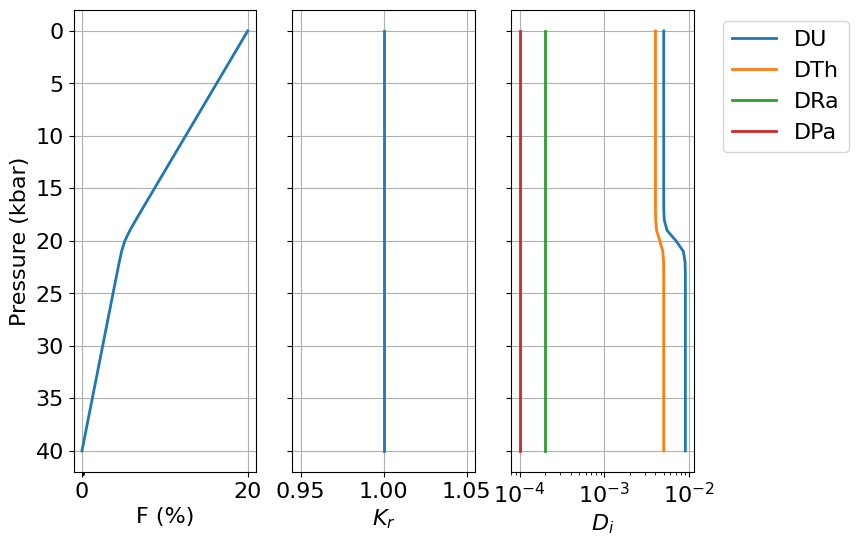

In [8]:
fig = UserCalc.plot_inputs(df)

#### Alternatively save the dataframe as a csv file

In [9]:
df.set_index(['P']).to_csv('data/sample_twolayer_model.csv')